In [45]:
from __future__ import division, print_function
from math import sin, cos, pi, sqrt, acos, asin, radians, isclose, degrees
from prrkalman import kalman_predict, kalman_update
import pandas as pd
import matplotlib.pyplot as plt

In [34]:
def show_triangle(a, B, c, b, A):
    print(f"a,B,c {a:.2f}, {degrees(B):.2f} {c:.2f} => A,b {degrees(A):.2f} {b:.2f} ")

In [35]:
def test_1():
    a = 1
    c = 1
    for B_index in range(0, 37):
        B = radians(B_index * 10)
        (b,  A) = kalman_predict(a, B, c)
        show_triangle(a, B, c, b, A)

In [36]:
def test_2():
    a = 1
    B = radians(360-46)
    for c in range(-5, 5):
        (b,  A) = kalman_predict(a, B, c)
        show_triangle(a, B, c, b, A)

In [37]:
if __name__ == "__main__":
    """ alll these examples use standard A,B,C, a,b,c notation """
    test_2()

a,B,c 1.00, 314.00 -5.00 => A,b 352.80 1.00 
a,B,c 1.00, 314.00 -4.00 => A,b 351.29 1.00 
a,B,c 1.00, 314.00 -3.00 => A,b 348.98 1.00 
a,B,c 1.00, 314.00 -2.00 => A,b 345.05 1.00 
a,B,c 1.00, 314.00 -1.00 => A,b 337.00 1.00 
a,B,c 1.00, 314.00 0.00 => A,b 314.00 1.00 
a,B,c 1.00, 314.00 1.00 => A,b 247.00 0.78 
a,B,c 1.00, 314.00 2.00 => A,b 208.86 1.49 
a,B,c 1.00, 314.00 3.00 => A,b 197.33 2.41 
a,B,c 1.00, 314.00 4.00 => A,b 192.28 3.38 


In [38]:
# elapsed,g_forward_cmd,g_turn_cmd,g_shortest_bearing,g_shortest
df=pd.read_csv('data3.csv', sep=',')

In [39]:
def test_harnass(K):
    state_dist = 0.8 # Initial state
    state_bear = radians(80) # Initial state
    for index, row in df.iterrows():
        meas_dist = row['g_shortest']
        meas_bear = radians(row['g_shortest_bearing'])
        control_motion = row['g_forward_cmd'] * row['elapsed']
        temp_state_dist, temp_state_bear = kalman_predict(state_dist, state_bear, control_motion)
        pure_state_dist, pure_state_bear = kalman_predict(meas_dist, meas_bear, control_motion)
        state_dist, state_bear = kalman_update(K, temp_state_dist, temp_state_bear, meas_dist, meas_bear)
        df.loc[df.index[index], 'm'] = control_motion    
        df.loc[df.index[index], 'meas_dist'] = meas_dist
        df.loc[df.index[index], 'pure_state_dist'] = pure_state_dist    
        df.loc[df.index[index], 'temp_state_dist'] = temp_state_dist
        df.loc[df.index[index], 'state_dist'] = state_dist
        df.loc[df.index[index], 'meas_bear'] = degrees(meas_bear)
        df.loc[df.index[index], 'pure_state_bear'] = degrees(pure_state_bear)
        df.loc[df.index[index], 'state_bear'] = degrees(state_bear)
        df.loc[df.index[index], 'temp_state_bear'] = degrees(temp_state_bear)
        df.loc[df.index[index], 'K'] = K
    return df

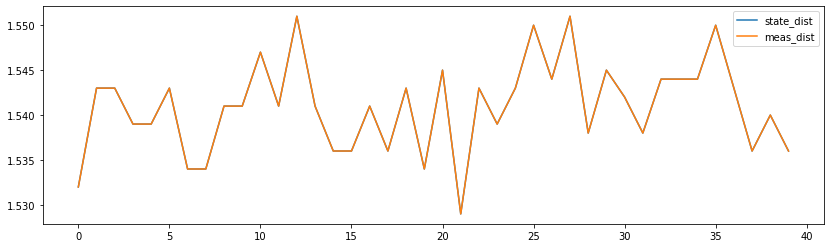

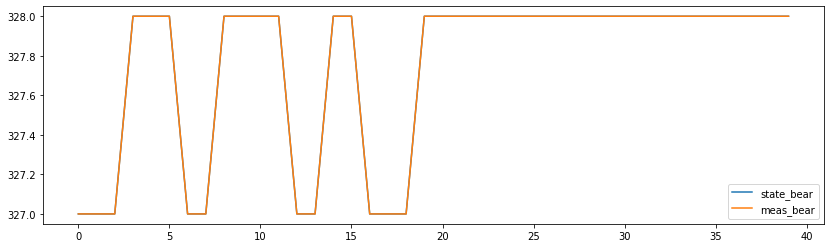

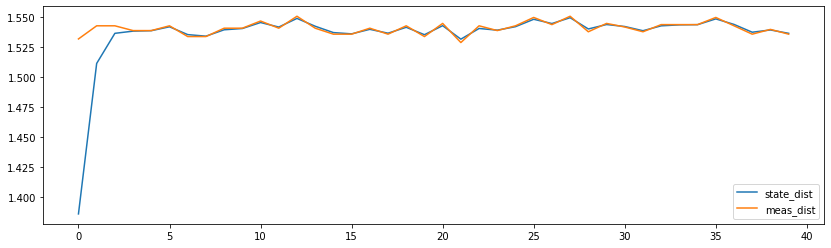

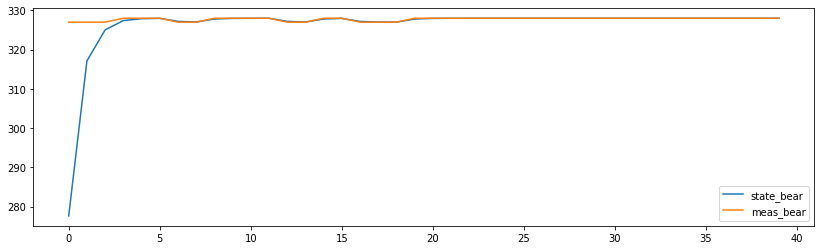

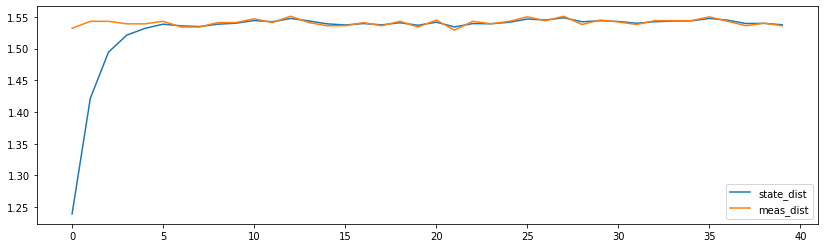

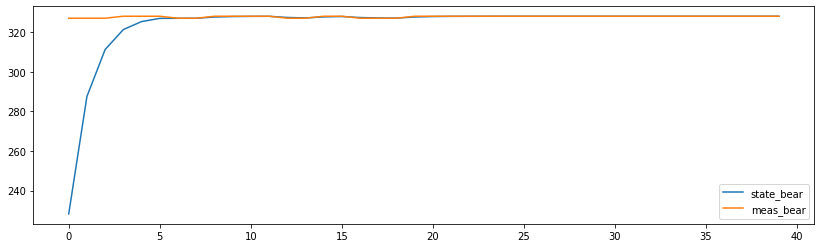

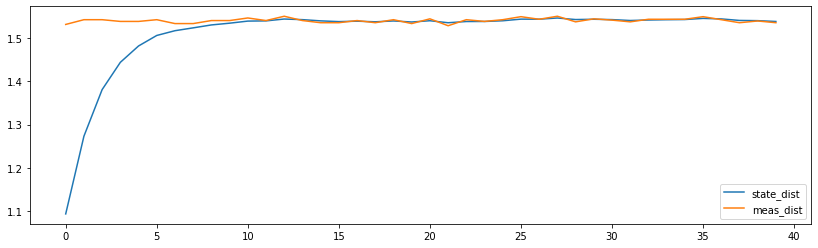

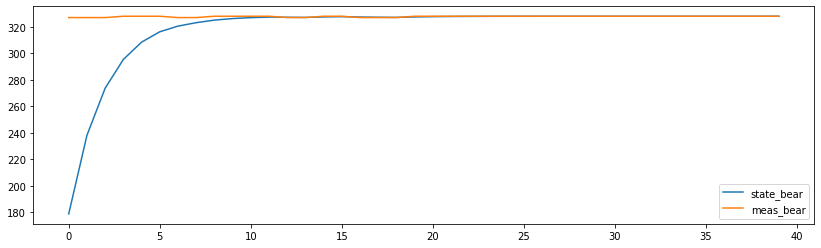

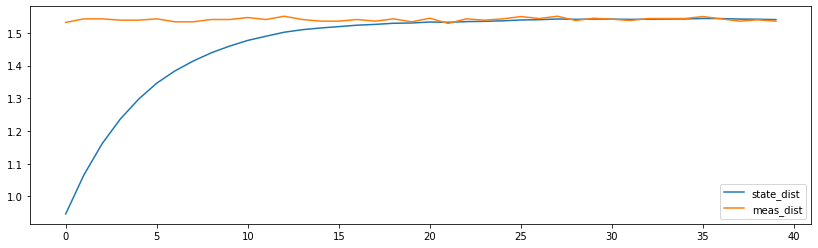

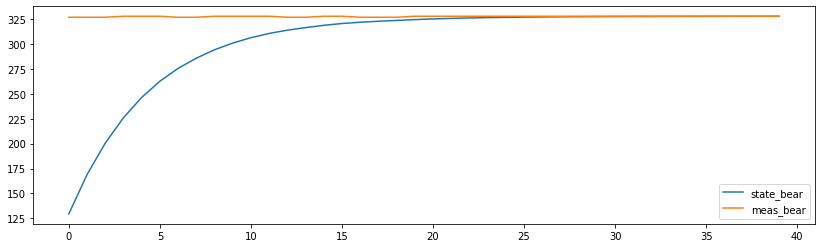

In [50]:
df=pd.read_csv('data1.csv', sep=',')
for k_prime in range(0,10,2):
    K = k_prime/10.0
    test_harnass(K)
    df.plot(y=['state_dist', 'meas_dist'], figsize=[14,4])
    df.plot(y=['state_bear', 'meas_bear'], figsize=[14,4])
    